## Imports

In [52]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

from sklearn.mixture import GaussianMixture

print("Packages Imported!")

Packages Imported!


## Settings

In [1]:
MANIFEST_PATH = "E:/datasets/allen_vc/manifest_files/manifest.json"
# MANIFEST_PATH = "D:/datasets/allen_vc/manifest.json"
PROJECT_PATH = "G:/Shared drives/visual_encoding"
REPO_PATH = 'C:/Users/User/visual_encoding'
# REPO_PATH = 'C:/Users/micha/projects/visual_encoding'
DATA_PATH = "G:/Shared drives/visual_encoding/data/optotagging_data/concat"

## Functions

In [3]:
#tbd

## Load Data

In [4]:
# load optotagging response data

# load waveform data

# concatenate and train model!

In [4]:
# Create Allensdk cache object
cache = EcephysProjectCache.from_warehouse(manifest=MANIFEST_PATH)

# Isolate functional connectivity sections
sessions = cache.get_session_table()
functional_connectivity_sessions = sessions[sessions['session_type'] == 'functional_connectivity']

In [7]:
# optotagging response data
opto_df = pd.read_csv(f'{DATA_PATH}/all_stimuli_rr.csv')
opto_df.head()

,unit_id,ecephys_structure_acronym,genotype,opto_stimulus,response_reliability,stim_level,stim_name
0,950922446,VISp,wt/wt,fast_pulses_1.0s_1,0.533333,1,fast_pulses_1.0s
1,950922495,VISp,wt/wt,fast_pulses_1.0s_1,0.133333,1,fast_pulses_1.0s
2,950922511,VISp,wt/wt,fast_pulses_1.0s_1,0.200000,1,fast_pulses_1.0s
3,950922546,VISp,wt/wt,fast_pulses_1.0s_1,0.133333,1,fast_pulses_1.0s
4,950922579,VISp,wt/wt,fast_pulses_1.0s_1,0.200000,1,fast_pulses_1.0s


In [15]:
opto_df['opto_stimulus'].unique()

array(['fast_pulses_1.0s_1', 'fast_pulses_1.0s_2', 'fast_pulses_1.0s_3',
       'pulse_0.0049999999991996455s_1', 'pulse_0.0049999999991996455s_2',
       'pulse_0.0049999999991996455s_3', 'pulse_0.01000000000021828s_1',
       'pulse_0.01000000000021828s_2', 'pulse_0.01000000000021828s_3',
       'raised_cosine_1.0s_1', 'raised_cosine_1.0s_2',
       'raised_cosine_1.0s_3'], dtype=object)

In [41]:
pd.merge

<function pandas.core.reshape.merge.merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'>

In [42]:
stim = 'pulse_0.01000000000021828s_3'
waveform_features = ['waveform_duration']
stim_df = opto_df[opto_df['opto_stimulus'] == stim].copy()
sub_dfs = []

# load units, select relevant features, left join with opto_df
for session_id in functional_connectivity_sessions.index:
    
    print(f'\t Computing Session: {session_id}')
    
    session = cache.get_session_data(session_id)
    units = session.units.reset_index()

    sub_dfs.append(stim_df.merge(units[['unit_id'] + waveform_features], how='left', on='unit_id').dropna(axis=0))
    
rwv_df = pd.concat(sub_dfs)

	 Computing Session: 766640955
	 Computing Session: 767871931
	 Computing Session: 768515987
	 Computing Session: 771160300
	 Computing Session: 771990200
	 Computing Session: 774875821
	 Computing Session: 778240327
	 Computing Session: 778998620
	 Computing Session: 779839471
	 Computing Session: 781842082
	 Computing Session: 786091066
	 Computing Session: 787025148
	 Computing Session: 789848216
	 Computing Session: 793224716
	 Computing Session: 794812542
	 Computing Session: 816200189
	 Computing Session: 819186360
	 Computing Session: 819701982
	 Computing Session: 821695405
	 Computing Session: 829720705
	 Computing Session: 831882777
	 Computing Session: 835479236
	 Computing Session: 839068429
	 Computing Session: 839557629
	 Computing Session: 840012044
	 Computing Session: 847657808


In [43]:
rwv_df

,unit_id,ecephys_structure_acronym,genotype,opto_stimulus,response_reliability,stim_level,stim_name,waveform_duration
117,950929267,VISp,wt/wt,pulse_0.01000000000021828s_3,0.000000,3,pulse_0.01000000000021828s,0.302178
118,950929283,VISp,wt/wt,pulse_0.01000000000021828s_3,0.000000,3,pulse_0.01000000000021828s,0.549414
119,950929299,VISp,wt/wt,pulse_0.01000000000021828s_3,0.000000,3,pulse_0.01000000000021828s,0.988945
127,950929417,VISp,wt/wt,pulse_0.01000000000021828s_3,0.066667,3,pulse_0.01000000000021828s,0.837856
128,950929433,VISp,wt/wt,pulse_0.01000000000021828s_3,0.066667,3,pulse_0.01000000000021828s,0.631826
...,...,...,...,...,...,...,...,...
1674,951187345,VISp,wt/wt,pulse_0.01000000000021828s_3,0.120000,3,pulse_0.01000000000021828s,0.192295
1675,951187357,VISp,wt/wt,pulse_0.01000000000021828s_3,0.000000,3,pulse_0.01000000000021828s,0.755444
1676,951187369,VISp,wt/wt,pulse_0.01000000000021828s_3,0.160000,3,pulse_0.01000000000021828s,0.233501
1677,951187421,VISp,wt/wt,pulse_0.01000000000021828s_3,0.000000,3,pulse_0.01000000000021828s,0.590620


In [45]:
rwv_df.to_csv('G:/Shared drives/visual_encoding/data/optotagging_data/concat/rr_wave_10ms_pulse.csv', index=False)

# Clustering

In [53]:
# settings
clust_set = {'n_components': 2, 'random_state': 0, 'verbose': 1}

In [54]:
gm = GaussianMixture(**clust_set)

In [55]:
X = rwv_df[['waveform_duration', 'response_reliability']]
gm.fit(X)

Initialization 0
  Iteration 10
Initialization converged: True


GaussianMixture(n_components=2, random_state=0, verbose=1)

In [56]:
gm.bic(X)

-5736.234668640546

In [57]:
gm.means_

array([[0.57632248, 0.01621829],
       [0.56832181, 0.20848813]])

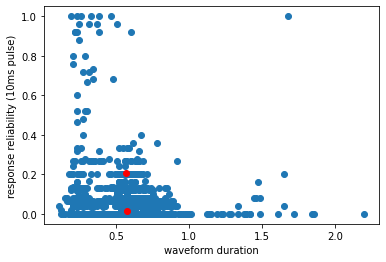

In [58]:
plt.scatter(X['waveform_duration'], X['response_reliability'])
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], color='red')
plt.xlabel('waveform duration')
plt.ylabel('response reliability (10ms pulse)');